In [30]:
# A Hadamard-sandwich Deutsch-Josza circuit setup

# Always start with imports

import qiskit as q
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

# If your editor is set to dark background, you can use
#
# from matplotlib import style
# style.use('dark_background') 
#

# matplotlib for visualizations
%matplotlib inline


# Declare simulators
# statevector_simulator to plot Bloch ballz
# qasm_simulator to plot distributions

statevector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_sim = q.Aer.get_backend('qasm_simulator')


# A function that will be done frequently
# This executes the circuit on both simulators
# and stores the results 
# statevector_simulator -> statevec 
#    for plot_bloch_multivector
# qasm_simulator -> counts 
#    for plot_histogram

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    # This was recently changed to num_qubits, 
    # from the older used attribute "n_qubits"
    num_qubits = circuit.num_qubits
    
    # Measure qubits to get counts
    # circuit.measure([from qubits],[to classical bits])
    circuit.measure([i for i in range(num_qubits)], [i for i in range(len(circuit.clbits))])
    
    # Execute the circuit named 'circuit' 
    # with backend 'qasm_sim'
    # return the results named qasm_job
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    
    # Extract the counts from the results
    counts = qasm_job.get_counts()
    
    # Return statevec for Bloch ballz
    # Return counts for histogram etc.
    return statevec, counts

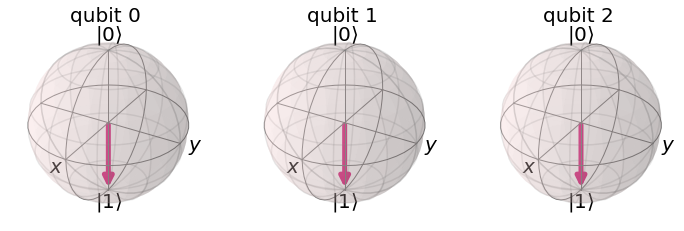

In [27]:
# Note: This starts from a fresh circuit each time
#       as opposed to building on existing

circuit = q.QuantumCircuit(3,3)


# Initialize the query qubits to |0>

circuit.initialize([1,0],0)
circuit.initialize([1,0],1)


# Initialize the bottom 'register' qubit to |1>
circuit.initialize([0,1],2)


# Create uniform superposition with a 
# Hadamard gate applied to wires 0,1,2

circuit.h([0,1,2]) 
# This also works:
# circuit.h(range(3))



# Add a barrier, to keep things tidy.
# Barriers have actual functional uses as well.
# Most people just use them for style.

circuit.barrier()

# An example of an oracle

circuit.cx(0,1)
circuit.cx(1,2)
circuit.cx(0,1)

# This oracle is 


# Another barrier

circuit.barrier()

# Return to computational basis states
# "Completing the Hadamard sandwich"

circuit.h([0,1,2])

# Another barrier, to keep the measurements to the right

circuit.barrier()

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

#
# According to DJ, we should measure:
#
# Balanced: |100> has probability 0
# Constant:  Otherwise. 
#           (We're assuming to be given an oracle
#            corresponding to either balanced or constant. So this 
#            an Either/Or situation.)



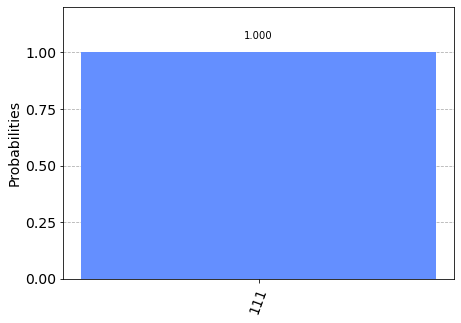

In [28]:
plot_histogram([counts])

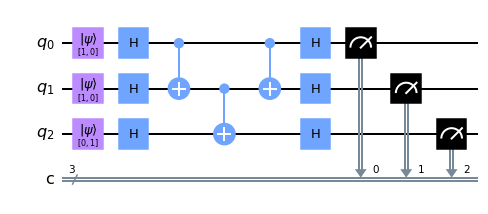

In [29]:
# 'mpl' means use matplotlib for prettier display
# You can opt out of displaying the barriers

circuit.draw(output='mpl', plot_barriers=False)